In [1]:
from pathlib import Path
from collections import defaultdict, Counter

import pandas as pd
import seaborn as sns
from PIL import Image, UnidentifiedImageError

In [2]:
data_path_irecord = Path("C:/data/nachtvlinderdata/IRecord")
data_path_telmee = Path("C:/data/nachtvlinderdata/telmee")

# CSVs

In [3]:
irecord_df = pd.read_csv(str(data_path_irecord / "mothsOriginal.csv"))
irecord_df.head()

,Unnamed: 0,id,preferred_taxon,default_common_name,path,media_count,taxon_group,order_taxon,record_status
0,1,2286726,Abraxas,NaN,o_19rvf6rou1sth116s1rgv9t4htp8.jpg,1,insect - moth,Lepidoptera,V
1,2,1121145,Abraxas grossulariata,The Magpie,p18sfqt0v4hst77d1n4m166d1m6qk.jpg,2,Moths,Lepidoptera,V
2,3,1168709,Abraxas grossulariata,The Magpie,p18t2dqc2o8gajhd1t751tjmmvnb.jpg,2,Moths,Lepidoptera,V
3,4,3885203,Abraxas grossulariata,Magpie,o_1aq9sn5er8bpddc1mji11mn1joc2e.jpg,1,insect - moth,Lepidoptera,V
4,5,7402049,Abraxas grossulariata,Magpie,04e6027fd0f70d7741296df7be42a242c4998830.jpg,1,insect - moth,Lepidoptera,C


In [4]:
irecord_df[["preferred_taxon", "default_common_name", "taxon_group", "order_taxon", "record_status"]].describe()

,preferred_taxon,default_common_name,taxon_group,order_taxon,record_status
count,110979,109599,110979,110851,110979
unique,2038,1801,2,1,2
top,Tyria jacobaeae,Cinnabar,insect - moth,Lepidoptera,V
freq,1345,1345,89274,110851,67584


In [5]:
irecord_df = pd.read_csv(str(data_path_irecord / "moths_images" / "moths_images.csv"))
irecord_df.head()

,�..,id,preferred_taxon,default_common_name,path,media_count,taxon_group,order_taxon,record_status,SpeciesLevel,Species_Status,URL,URLExists,downloaded
0,2,1121145,Abraxas_grossulariata,The Magpie,p18sfqt0v4hst77d1n4m166d1m6qk.jpg,2,Moths,Lepidoptera,V,Abraxas grossulariata,Abraxas grossulariata_V,https://warehouse1.indicia.org.uk/upload/p18sf...,NaN,False
1,3,1168709,Abraxas_grossulariata,The Magpie,p18t2dqc2o8gajhd1t751tjmmvnb.jpg,2,Moths,Lepidoptera,V,Abraxas grossulariata,Abraxas grossulariata_V,https://warehouse1.indicia.org.uk/upload/p18t2...,NaN,False
2,4,3885203,Abraxas_grossulariata,Magpie,o_1aq9sn5er8bpddc1mji11mn1joc2e.jpg,1,insect - moth,Lepidoptera,V,Abraxas grossulariata,Abraxas grossulariata_V,https://warehouse1.indicia.org.uk/upload/o_1aq...,NaN,False
3,5,7402049,Abraxas_grossulariata,Magpie,04e6027fd0f70d7741296df7be42a242c4998830.jpg,1,insect - moth,Lepidoptera,C,Abraxas grossulariata,Abraxas grossulariata_C,https://warehouse1.indicia.org.uk/upload/04e60...,NaN,False
4,6,78549,Abraxas_grossulariata,The Magpie,p174l8pqhmftliq610e01bk61ohm2.jpg,2,Moths,Lepidoptera,V,Abraxas grossulariata,Abraxas grossulariata_V,https://warehouse1.indicia.org.uk/upload/p174l...,NaN,False


In [6]:
irecord_df[["preferred_taxon", "default_common_name", "taxon_group", "order_taxon", "record_status"]].describe()

,preferred_taxon,default_common_name,taxon_group,order_taxon,record_status
count,109918,109433,109887,109792,109916
unique,1874,1797,8,7,8
top,Tyria_jacobaeae,Cinnabar,insect - moth,Lepidoptera,V
freq,1345,1345,88213,109568,67028


In [7]:
telmee_df = pd.read_csv(str(data_path_telmee / "export_ndff3.csv"))
telmee_df.head()

,soort,path,validatiestatus
0,Abraxas grossulariata,https://telmee.nl/uploads/2014/6/98739931_1.jpg,beoordeeld door soortexpert
1,Abraxas grossulariata,https://telmee.nl/uploads/2014/6/98731231_1.jpg,beoordeeld door soortexpert
2,Abraxas grossulariata,https://telmee.nl/uploads/2012/6/57516184_1.jpg,beoordeeld door soortexpert
3,Abraxas grossulariata,https://telmee.nl/uploads/2014/6/98730003_2.jpg,beoordeeld door soortexpert
4,Abraxas grossulariata,https://telmee.nl/uploads/2013/6/69199783_1.jpg,beoordeeld door soortexpert


In [8]:
telmee_df.describe()

,soort,path,validatiestatus
count,69908,69908,69908
unique,714,69895,7
top,Autographa gamma,https://telmee.nl/uploads/2008/6/2553707_1.jpg,beoordeeld door soortexpert
freq,1515,2,68604


# Image folders

## IRecord

In [9]:
folder_path_irecord = data_path_irecord / "moths_images"
len(list(folder_path_irecord.iterdir()))

1784

In [10]:
num_images_irecord = Counter({k: v for k, v in {p.name: len(list(p.iterdir())) for p in folder_path_irecord.iterdir() if p.is_dir()}.items() if v > 0})
num_images_irecord.most_common(10)

[('Tyria jacobaeae', 1344),
 ('Autographa gamma', 1272),
 ('Noctua pronuba', 1063),
 ('Peribatodes rhomboidaria', 795),
 ('Phlogophora meticulosa', 779),
 ('Epiphyas postvittana', 758),
 ('Opisthograptis luteolata', 755),
 ('Deilephila elpenor', 753),
 ('Agrotis exclamationis', 736),
 ('Dysstroma truncata', 723)]

<AxesSubplot:ylabel='Count'>

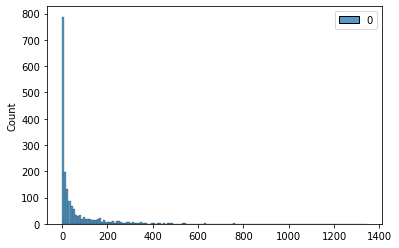

In [11]:
sns.histplot(num_images_irecord.values())

In [12]:
pd.DataFrame(num_images_irecord.values(), columns=["num images"]).describe()

,num images
count,1781.000000
mean,61.035373
std,118.860736
min,1.000000
25%,3.000000
50%,15.000000
75%,58.000000
max,1344.000000


In [13]:
sum(num_images_irecord.values())

108704

In [14]:
# Takes long
resolutions_irecord = []
for class_path in folder_path_irecord.iterdir():
    
    if not class_path.is_dir():
        continue
    
    for image_path in class_path.iterdir():
        try:
            img = Image.open(image_path)
        except UnidentifiedImageError:
            continue
        width, height = img.size
        resolutions_irecord.append((width, height))

In [15]:
resolutions_irecord_df = pd.DataFrame(resolutions_irecord, columns=["width", "height"])
resolutions_irecord_df.describe()

,width,height
count,108700.000000,108700.000000
mean,967.453395,826.783496
std,137.141030,213.274919
min,104.000000,104.000000
25%,1000.000000,685.000000
50%,1024.000000,768.000000
75%,1024.000000,960.000000
max,2816.000000,2574.000000


<AxesSubplot:xlabel='width', ylabel='height'>

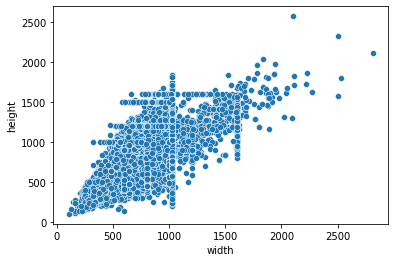

In [17]:
sns.scatterplot(data=resolutions_irecord_df, x="width", y="height")

## Telmee

In [18]:
folder_path_telmee = data_path_telmee / "photos"
len(list(folder_path_telmee.iterdir()))

714

In [19]:
num_images_telmee = Counter({p.name: len(list(p.iterdir())) for p in folder_path_telmee.iterdir()})
num_images_telmee.most_common(10)

[('Autographa gamma', 1439),
 ('Noctua pronuba', 1201),
 ('Macroglossum stellatarum', 802),
 ('Erannis defoliaria', 776),
 ('Peribatodes rhomboidaria', 767),
 ('Ectropis crepuscularia', 708),
 ('Idaea aversata', 690),
 ('Operophtera brumata', 657),
 ('Phlogophora meticulosa', 613),
 ('Hypena proboscidalis', 592)]

<AxesSubplot:ylabel='Count'>

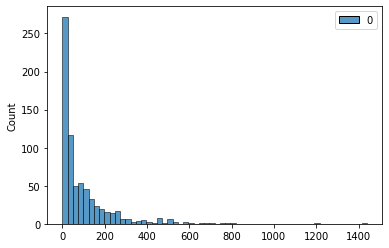

In [20]:
sns.histplot(num_images_telmee.values())

In [21]:
pd.DataFrame(num_images_telmee.values(), columns=["num images"]).describe()

,num images
count,714.000000
mean,95.582633
std,140.827138
min,1.000000
25%,11.250000
50%,42.000000
75%,123.750000
max,1439.000000


In [22]:
sum(num_images_telmee.values())

68246

In [23]:
# Takes long
resolutions_telmee = []
for class_path in folder_path_telmee.iterdir():
    for image_path in class_path.iterdir():
        try:
            img = Image.open(image_path)
        except (UnidentifiedImageError, PermissionError):
            continue
        width, height = img.size
        resolutions_telmee.append((width, height))

In [24]:
resolutions_telmee_df = pd.DataFrame(resolutions_telmee, columns=["width", "height"])
resolutions_telmee_df.describe()

,width,height
count,68233.000000,68233.000000
mean,761.662905,561.223968
std,116.788536,101.591637
min,87.000000,88.000000
25%,800.000000,531.000000
50%,800.000000,533.000000
75%,800.000000,600.000000
max,4288.000000,3888.000000


<AxesSubplot:xlabel='width', ylabel='height'>

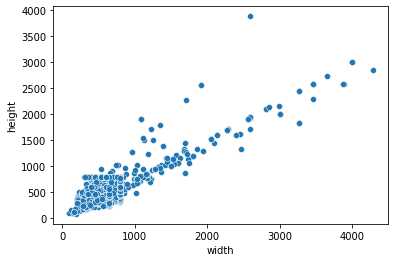

In [25]:
sns.scatterplot(data=resolutions_telmee_df, x="width", y="height")

## Merged

In [26]:
sum(num_images_telmee.values()) + sum(num_images_irecord.values())

176950

In [31]:
classes_irecord = {p.name for p in folder_path_irecord.iterdir()}
classes_telmee = {p.name for p in folder_path_telmee.iterdir()}

In [35]:
len(classes_irecord), len(classes_telmee), len(classes_irecord | classes_telmee), len(classes_irecord & classes_telmee), len(classes_irecord - classes_telmee),  len(classes_telmee - classes_irecord)

(1784, 714, 1906, 592, 1192, 122)

In [34]:
num_images_all = num_images_irecord + num_images_telmee
num_images_all.most_common(10)

[('Autographa gamma', 2711),
 ('Noctua pronuba', 2264),
 ('Tyria jacobaeae', 1852),
 ('Peribatodes rhomboidaria', 1562),
 ('Phlogophora meticulosa', 1392),
 ('Idaea aversata', 1325),
 ('Macroglossum stellatarum', 1301),
 ('Opisthograptis luteolata', 1268),
 ('Erannis defoliaria', 1124),
 ('Agrotis exclamationis', 1093)]

<AxesSubplot:ylabel='Count'>

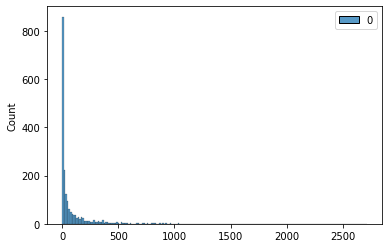

In [38]:
sns.histplot(num_images_all.values())

In [39]:
pd.DataFrame(num_images_all.values(), columns=["num images"]).describe()

,num images
count,1903.000000
mean,92.984761
std,195.264851
min,1.000000
25%,4.000000
50%,20.000000
75%,89.000000
max,2711.000000
